### We have data on the crowdfunding platform - Kickstarter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/ks-patrakeev/ks.csv', sep=";") #collecting data from the platform

In [3]:
data.head()

,Name,Category,Main_category,Currency,Deadline,Publication_data,State,Investor,Country,Collected_dollars,Target_dollars
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00


|***Columns*** |***Describe***|
|--------------|:-----------------------------|
|**Name**|name of the object for which need to raise money|
|**Currency**|subcategory more detailed category|
|**Deadline**|last day for gather money|
|**Publication_data**|day of publication|
|**State**|status of gather| 
|**Investor**|amount of investorov| 
|**Country**|in which country the request was created|
|**Collected_dollars**|amount of gathering|
|**Target_dollars**|necessary amount of gathering|

* Let's look at the states:

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


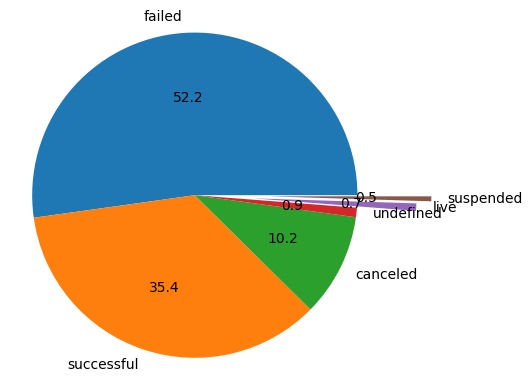

In [4]:
import seaborn as sns
#create pie chart
explode = (0, 0, 0, 0.0, 0.4, 0.5)
plt.pie(list(data.State.value_counts()), labels = list(data.State.value_counts().keys()), autopct='%.1f',radius = 1.1,explode =explode)
plt.show()

#### Let's leave only the necessary states and transfer them to the target
* 'failed' 
* 'successful'

In [5]:
data = data[data['State'].isin(['failed', 'successful'])] #leave only failed and successful
data.loc[(data['State'] == 'failed'), 'target'] = 0 #rename for binary format and created column tarfet
data['target'] = data['target'].fillna(1) #rename for binary format
data = data.drop(columns=['State']) #del column State
data['target'] = data['target'].astype(int)
data.head()

,Name,Category,Main_category,Currency,Deadline,Publication_data,Investor,Country,Collected_dollars,Target_dollars,target
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,23,US,600.00,600.0,1
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,20,US,502.00,10000.0,0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,62,US,2414.00,1400.0,1
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,86,US,10030.88,10000.0,1
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,US,0.00,10000.0,0


In [6]:
#Let's convert to datetime format
data['Deadline'] = pd.to_datetime(data['Deadline'])
data['Publication_data'] = pd.to_datetime(data['Publication_data'])

In [7]:
#Let's create a term column
data['Term'] = (data['Deadline'] - data['Publication_data']).dt.days

In [8]:
### Let's highlight the year the project was launched
data['Publication_year'] = data['Publication_data'].dt.year

In [9]:
data.loc[:, 'Publication_data'] = data['Publication_data'].dt.date.astype('datetime64[ns]')

In [10]:
data = data.sort_values('Publication_data') #sorted of date publication

In [11]:
data = data.drop(['Publication_data','Deadline'], axis=1)

In [12]:
#check columns with Nan
data.isna().sum()

Name                 3
Category             0
Main_category        0
Currency             0
Investor             0
Country              0
Collected_dollars    0
Target_dollars       0
target               0
Term                 0
Publication_year     0
dtype: int64

In [13]:
#remove columns with Nan because there are few of them

data = data.drop(data[data.isnull().any(axis=1)].index)
data.isna().sum()

Name                 0
Category             0
Main_category        0
Currency             0
Investor             0
Country              0
Collected_dollars    0
Target_dollars       0
target               0
Term                 0
Publication_year     0
dtype: int64

In [14]:
data.head()

,Name,Category,Main_category,Currency,Investor,Country,Collected_dollars,Target_dollars,target,Term,Publication_year
200855,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.0,1000.0,0,39,2009
276057,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,3,US,22.0,80000.0,0,87,2009
278951,drawing for dollars,Illustration,Art,USD,3,US,35.0,20.0,1,8,2009
92182,Offline Wikipedia iPhone app,Software,Technology,USD,25,US,145.0,99.0,1,79,2009
206673,Pantshirts,Fashion,Fashion,USD,10,US,387.0,1900.0,0,28,2009


### EDA

Text(0.5, 1.0, 'target')

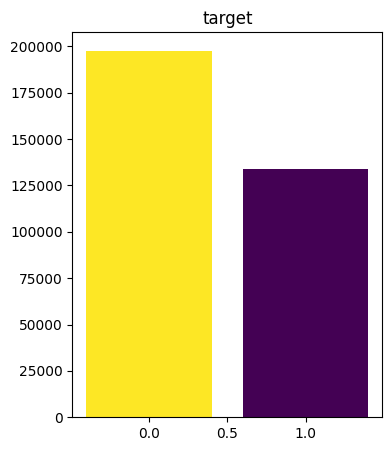

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(4, 5)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

hist = data.groupby('target')['target'].count().sort_values()
ax_1 = fig.add_subplot(1,1,1)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks()
plt.title('target')



### We see Class Imbalance

In [16]:
Count_1 = data[data['target']==1].shape[0]
Count_0 = data[data['target']==0].shape[0]
print(f'Count target 1 = {Count_1}')
print(f'Count target 0 = {Count_0}')
print(f'Rate = {Count_0 / Count_1:.3}')

Count target 1 = 133956
Count target 0 = 197716
Rate = 1.48


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


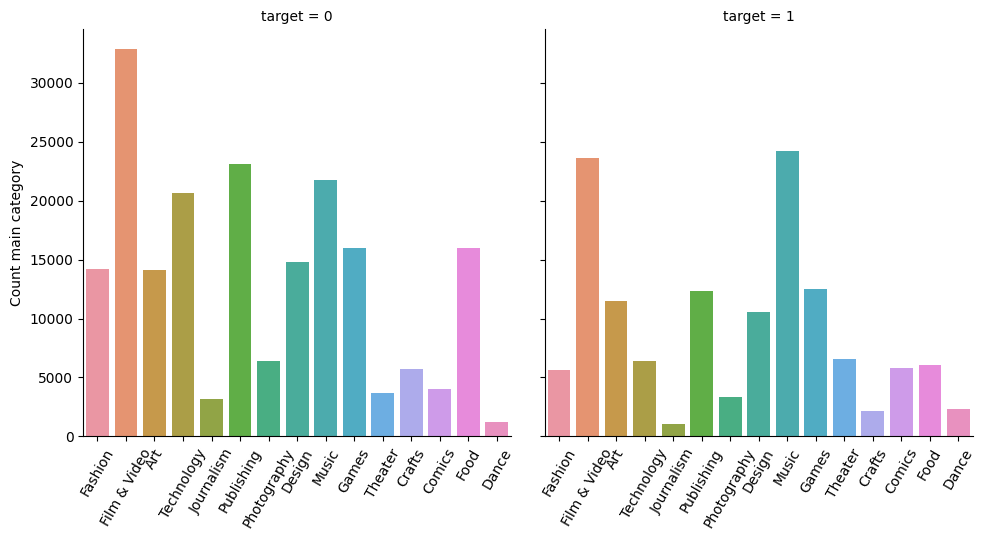

In [19]:
g = sns.catplot(x='Main_category', kind='count', col='target', data=data)
g.set_xticklabels(rotation=60)
g.set_axis_labels("", "Count main category")

- We see differences in subcategories depending on the target. 
- In most cases there are more successes than failed.
- However, some categories: Theaters, Comics and Dance - more success
* In the graph below we can see a similar picture for subcategories

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/si

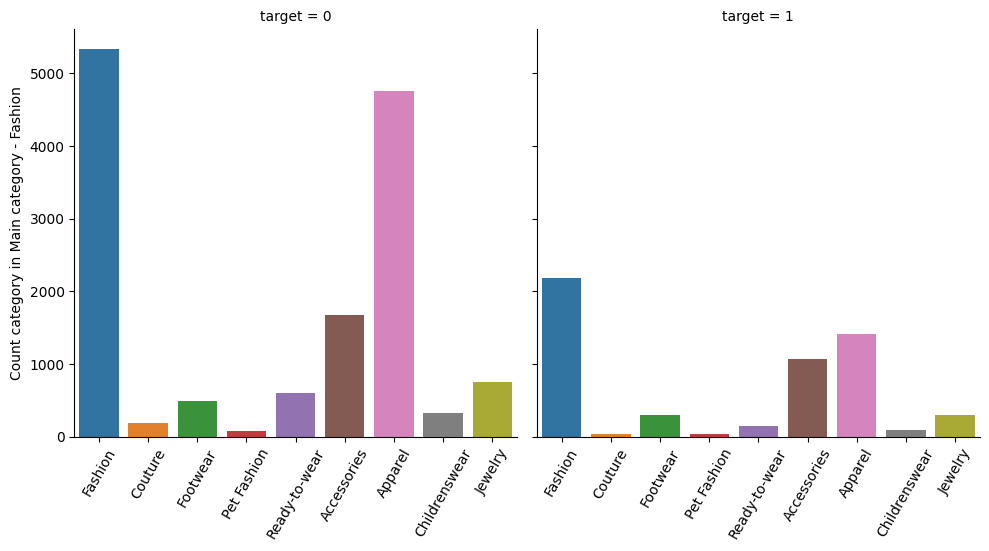

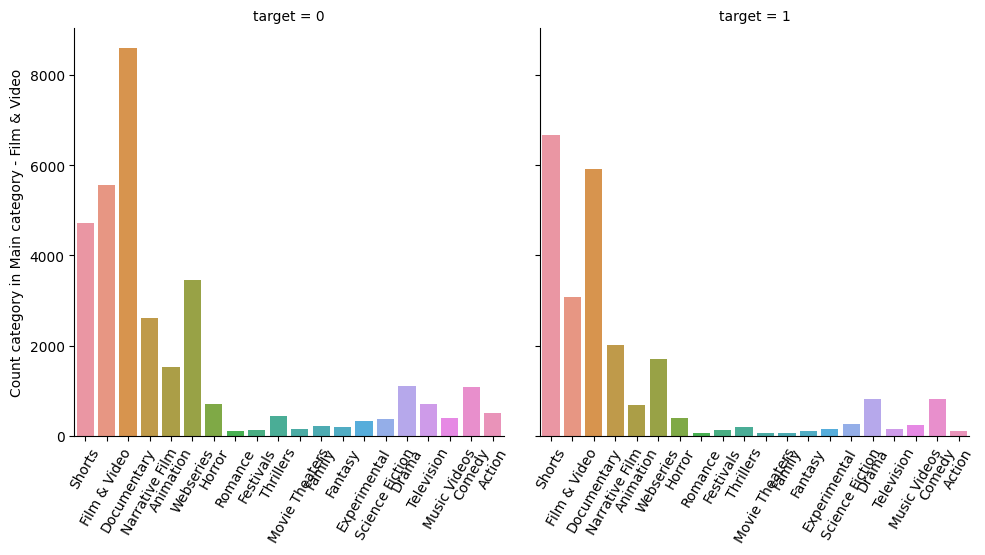

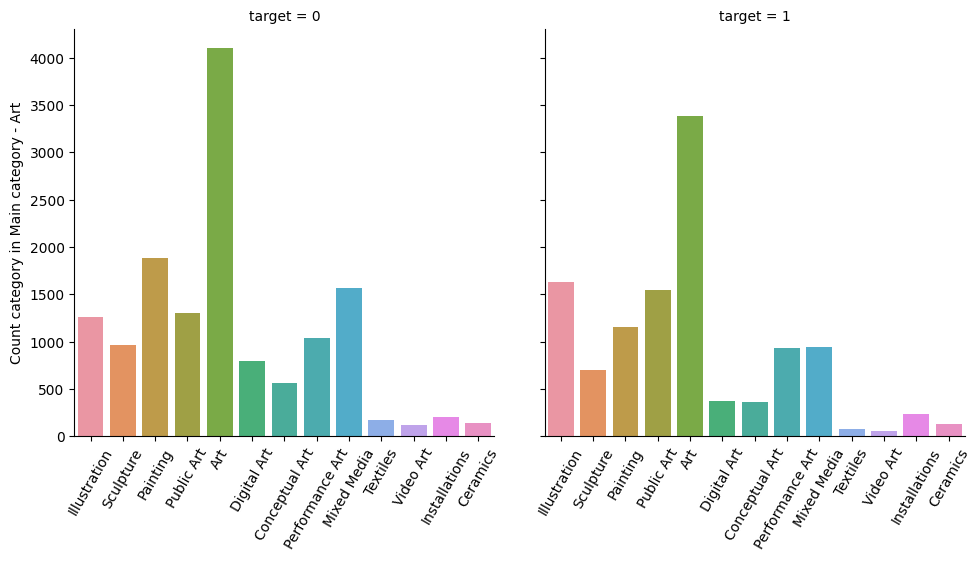

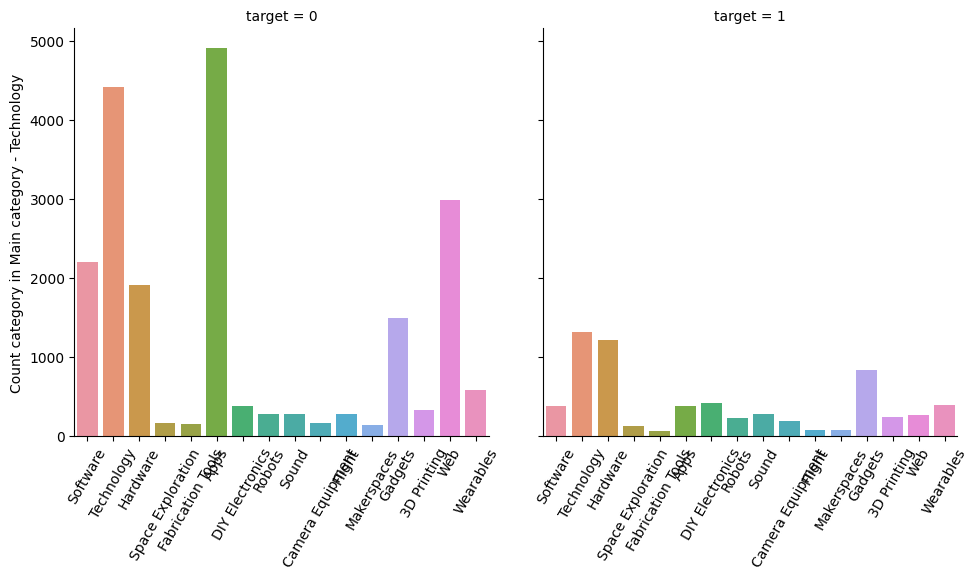

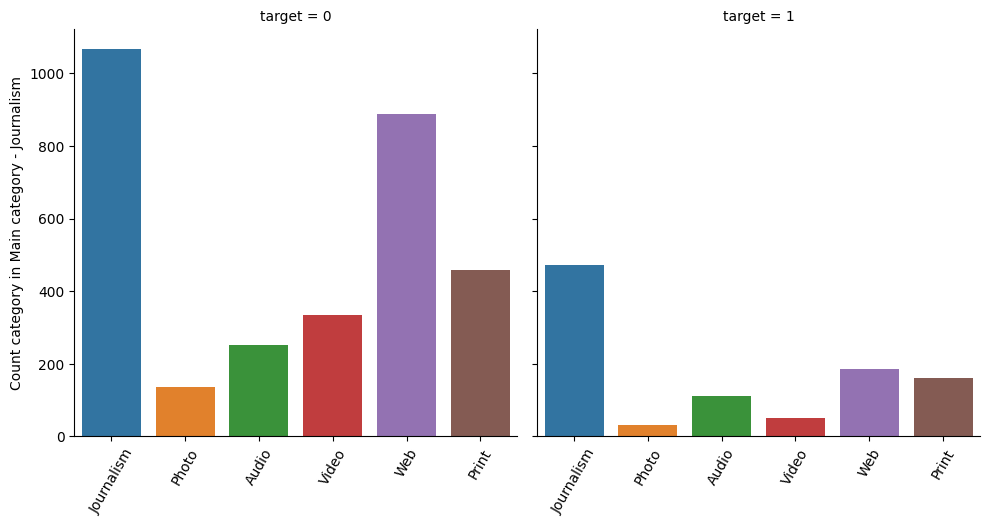

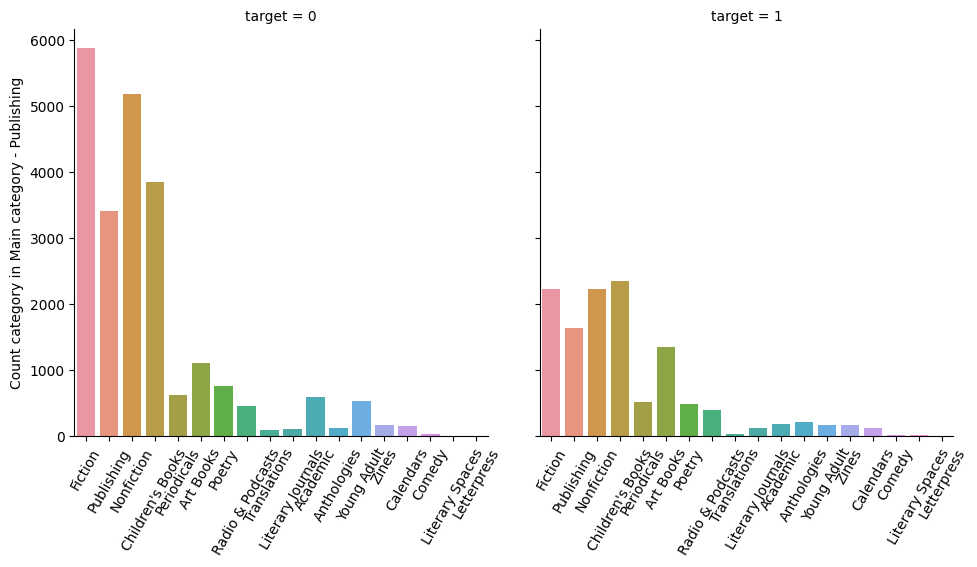

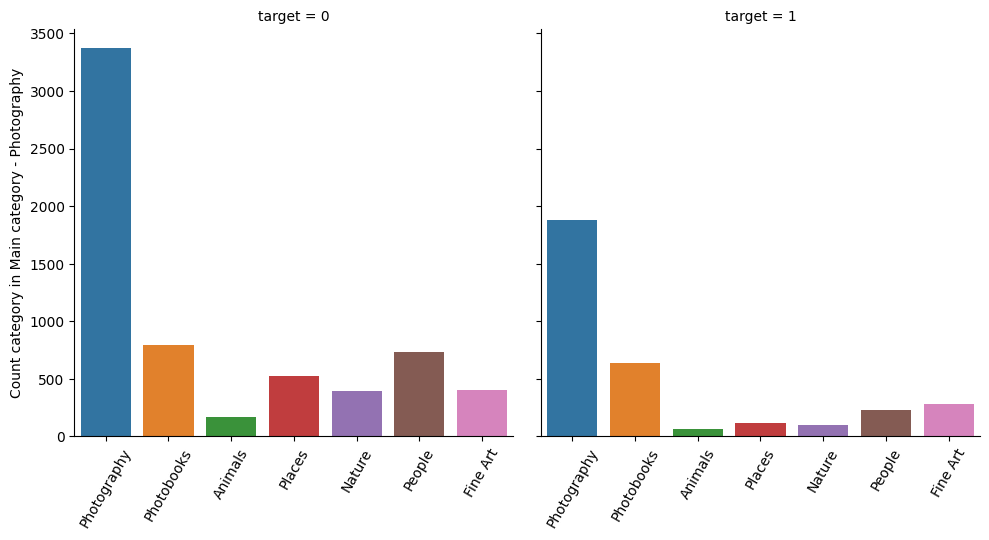

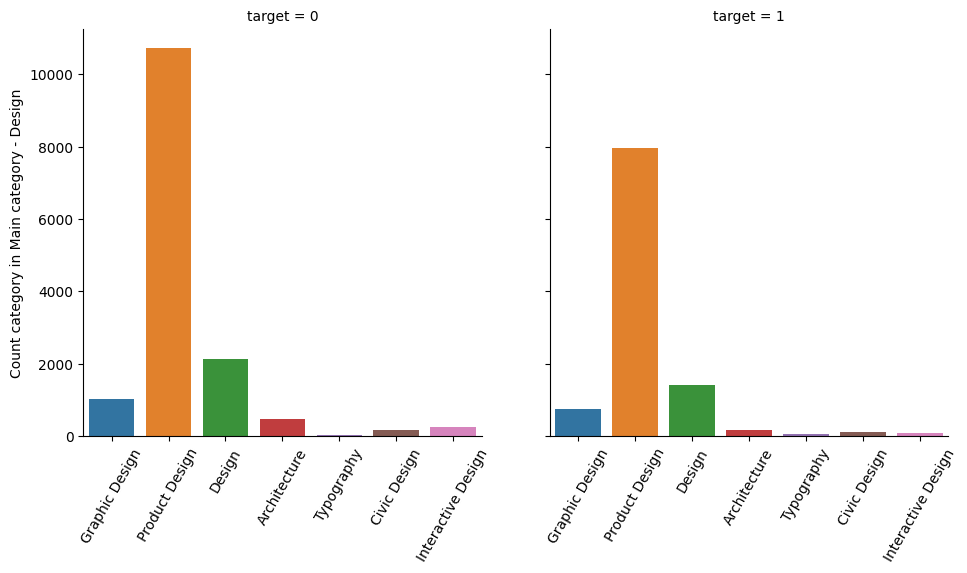

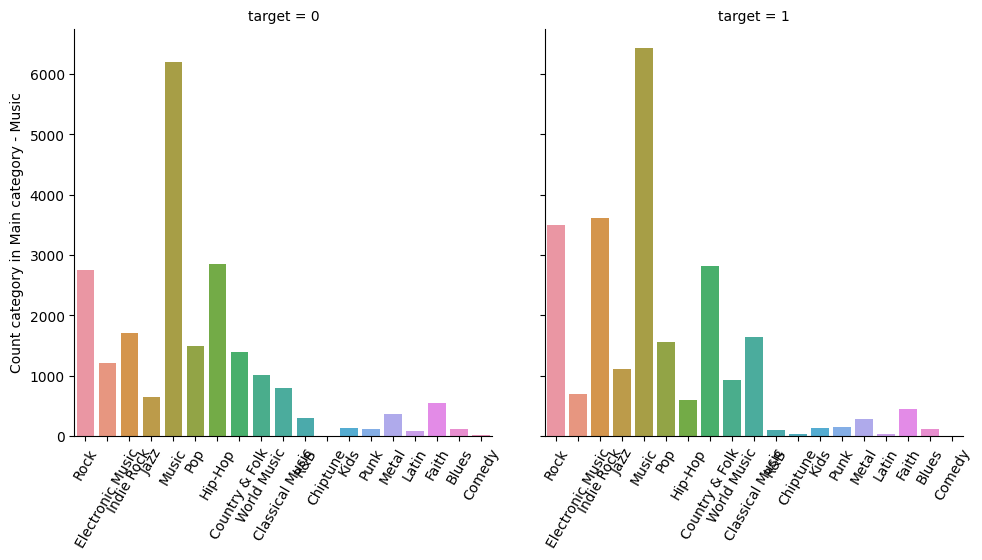

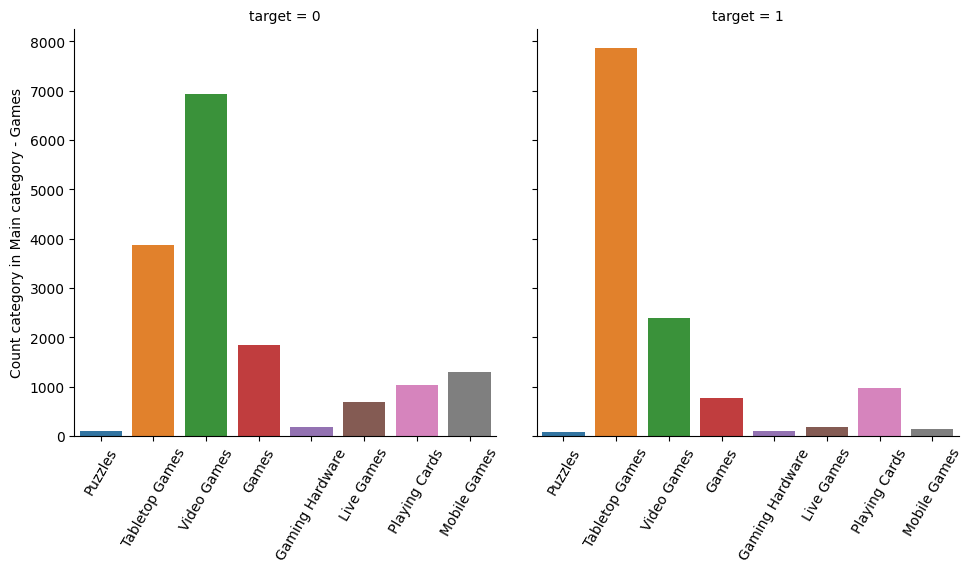

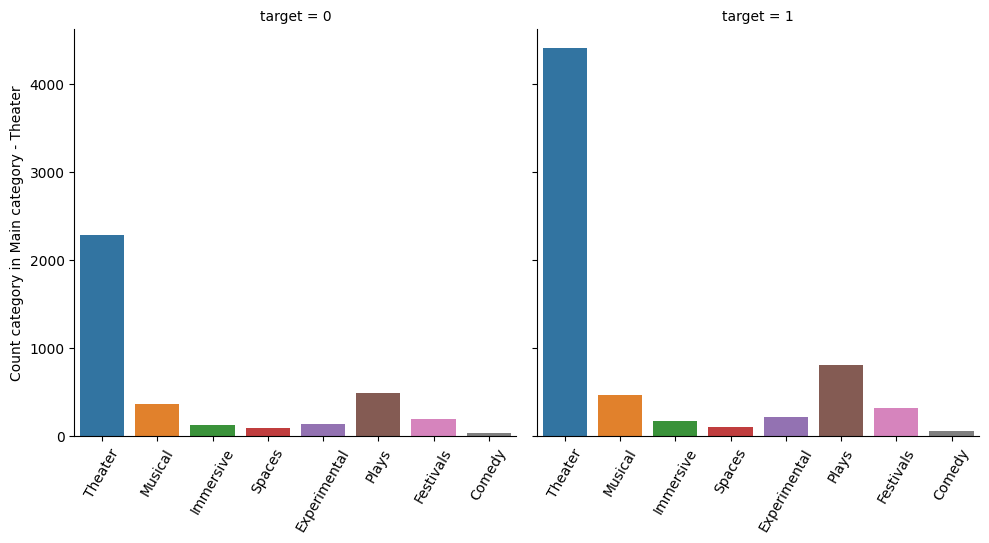

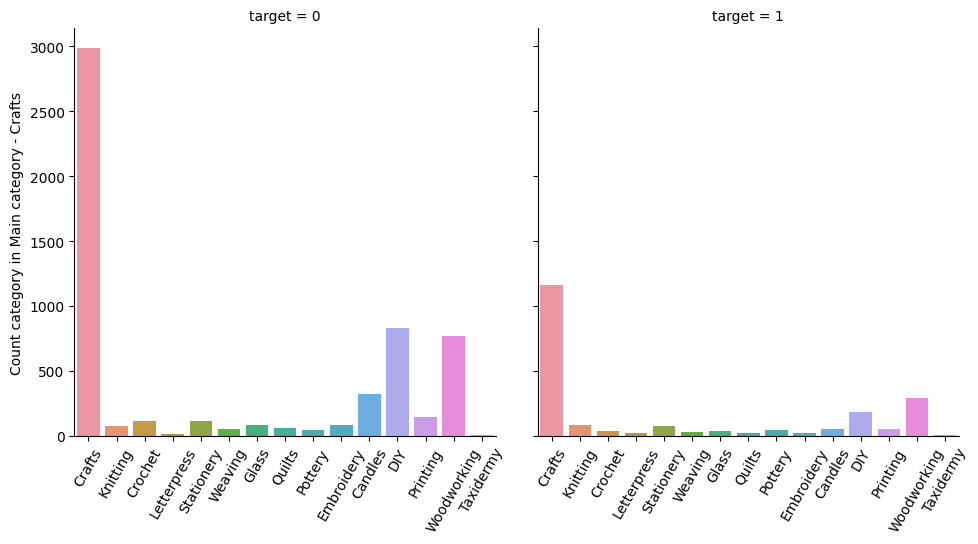

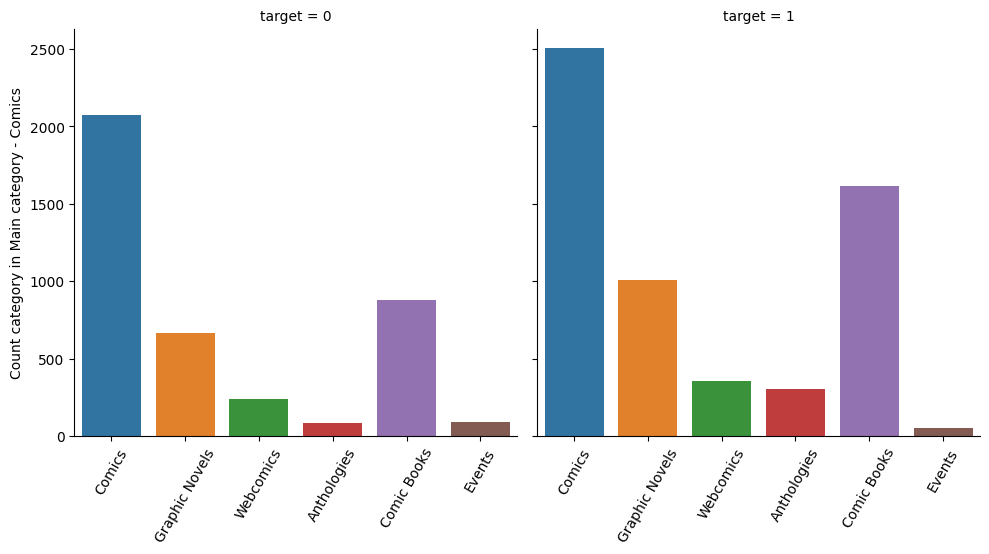

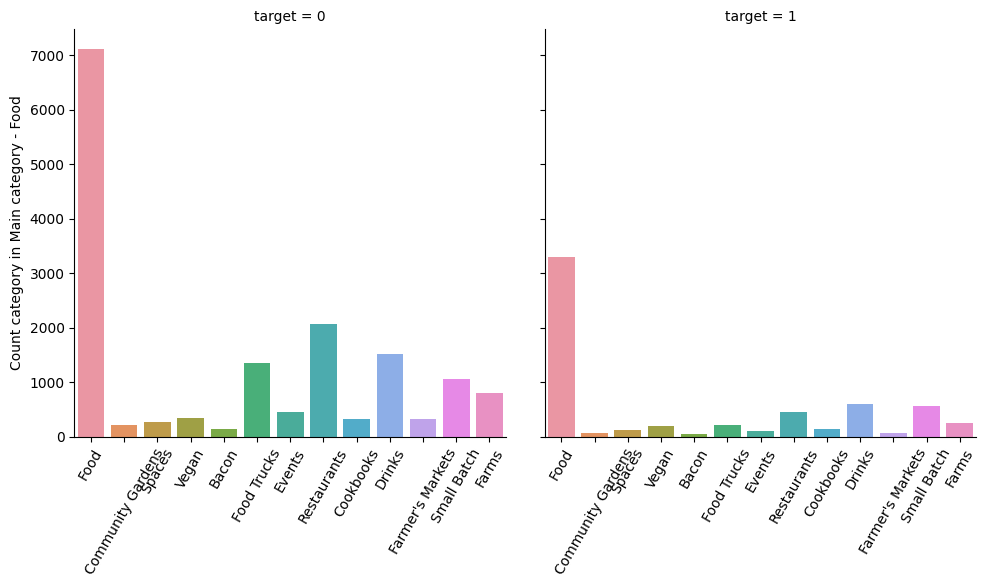

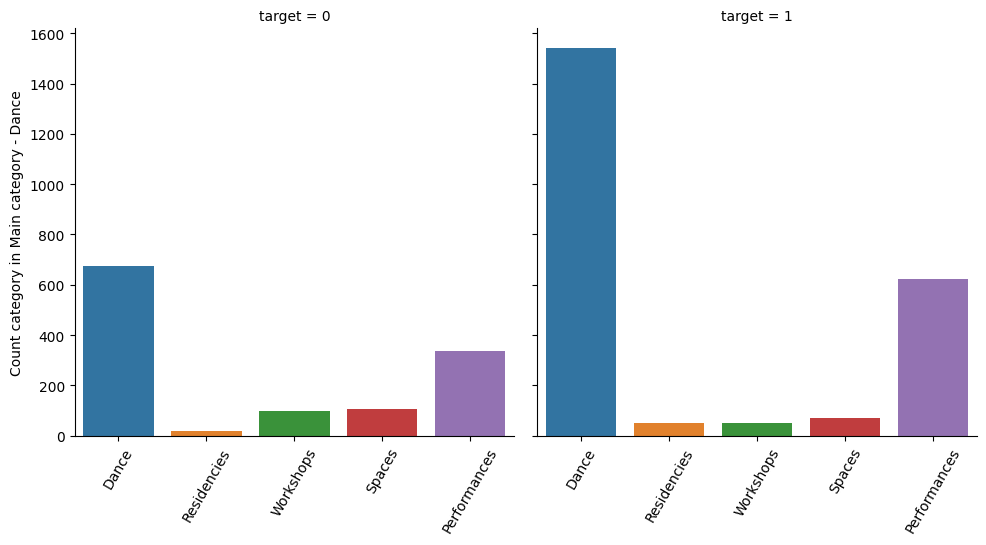

In [20]:
for i in data['Main_category'].unique():
    g = sns.catplot(x='Category', kind='count', col='target', data=data[data['Main_category']==f'{i}'])
    g.set_xticklabels(rotation=60)
    g.set_axis_labels("", f"Count category in Main category - {i}")

- Let's see on countries and currency:
- We see the same distribution of successes and failed

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


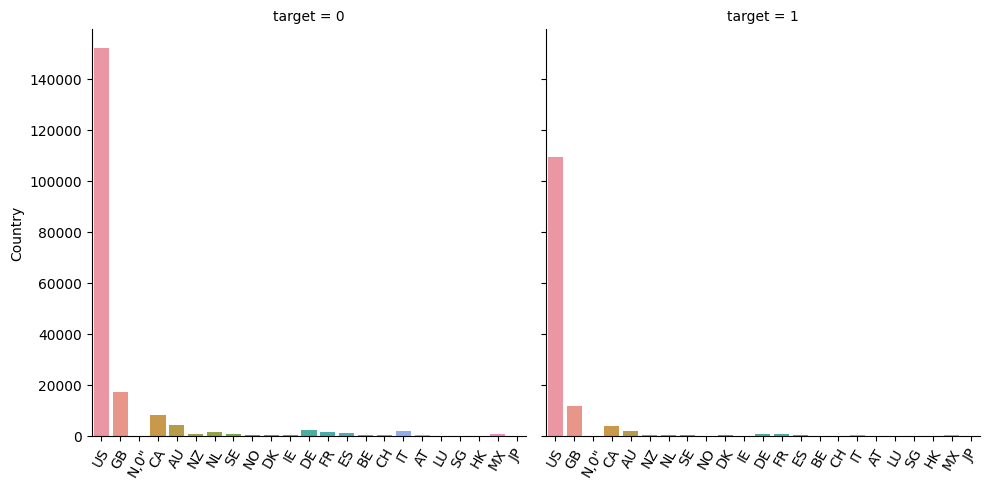

In [21]:
g = sns.catplot(x='Country', kind='count', col='target', data=data)
g.set_xticklabels(rotation=60)
g.set_axis_labels("", "Country")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


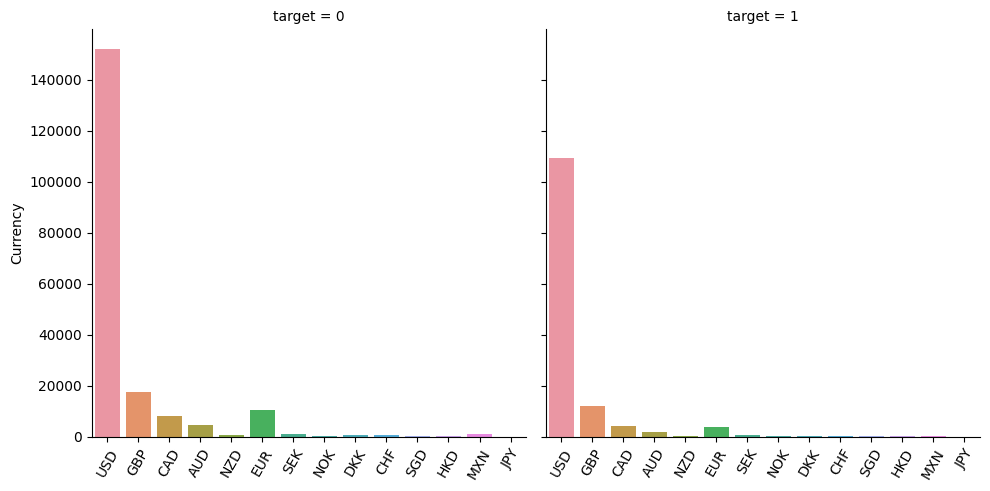

In [22]:
g = sns.catplot(x='Currency', kind='count', col='target', data=data)
g.set_xticklabels(rotation=60)
g.set_axis_labels("", "Currency")

Text(0.5, 1.0, 'target = 1')

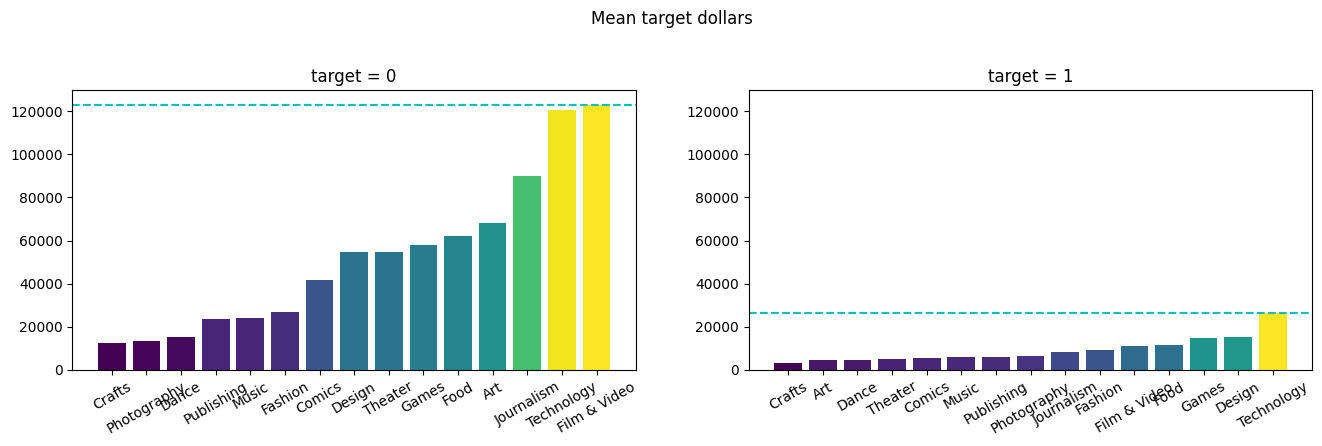

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(16, 8)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

fig.suptitle('Mean target dollars')
hist_1 = data[data['target']==0].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_1 = fig.add_subplot(2,2,1)
ax_1.axhline(y=hist_1['Film & Video'], color='c', linestyle='--')
plt.bar(hist_1.index, hist_1.values, color=my_cmap(rescale(hist_1.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,130000)
plt.title('target = 0')

hist_2 = data[data['target']==1].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_2 = fig.add_subplot(2,2,2)
ax_2.axhline(y=hist_2['Technology'], color='c', linestyle='--', )
plt.bar(hist_2.index, hist_2.values, color=my_cmap(rescale(hist_2.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,130000)
plt.title('target = 1')


Above we can see that on average, with a dollar target of more than 20,000, most often it does not reach the goal

In [24]:
#ratio_successful_failed = data \
#    .groupby(['Main_category'])['target']\
#    .agg(successful = lambda x: (x==1).sum(),
#         failed = lambda x: (x==0).sum())

In [25]:
#ratio_successful_failed['ratio_successful_failed'] = ratio_successful_failed.successful / ratio_successful_failed.failed
#ratio_successful_failed = ratio_successful_failed.drop(columns=['successful','failed'])

In [26]:
#ratio_successful_failed.head()

In [16]:
#user_data_new = data.merge(ratio_successful_failed, on='Main_category', how='inner')
user_data_new = data.copy()

In [17]:
#work with text
user_data_new['name_length'] = user_data_new['Name'].apply(lambda x: len(x) if isinstance(x, str) else x=='0')

In [18]:
user_data_new.head()

,Name,Category,Main_category,Currency,Investor,Country,Collected_dollars,Target_dollars,target,Term,Publication_year,name_length
200855,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.0,1000.0,0,39,2009,59
276057,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,3,US,22.0,80000.0,0,87,2009,30
278951,drawing for dollars,Illustration,Art,USD,3,US,35.0,20.0,1,8,2009,19
92182,Offline Wikipedia iPhone app,Software,Technology,USD,25,US,145.0,99.0,1,79,2009,28
206673,Pantshirts,Fashion,Fashion,USD,10,US,387.0,1900.0,0,28,2009,10


Text(0.5, 1.0, 'Collected_dollars')

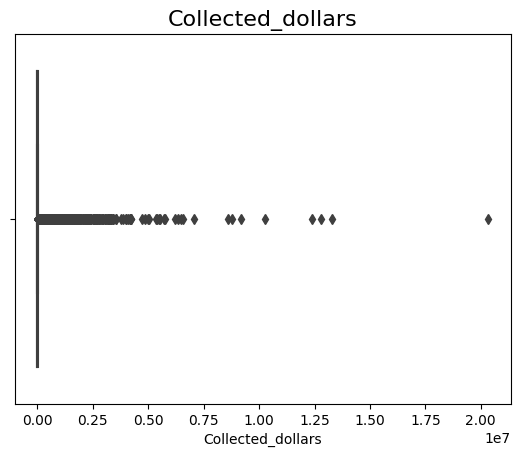

In [19]:
### Нарисуем ящик с усами
boxplot = sns.boxplot(x='Collected_dollars',  data=user_data_new, orient='h')
boxplot.axes.set_title("Collected_dollars", fontsize=16)

In [20]:
q_low = user_data_new['Collected_dollars'].quantile(0.001)
print(f' q_low {q_low}')
q_high = user_data_new['Collected_dollars'].quantile(0.999)
print(f' q_low {q_high}')
tentacle_length = q_high - q_low

upper_tentacle = q_high + 3 * tentacle_length

 q_low 0.0
 q_low 844460.3237600273


In [21]:
user_data_new = user_data_new[user_data_new['Collected_dollars']<upper_tentacle]

Text(0.5, 1.0, 'Collected_dollars')

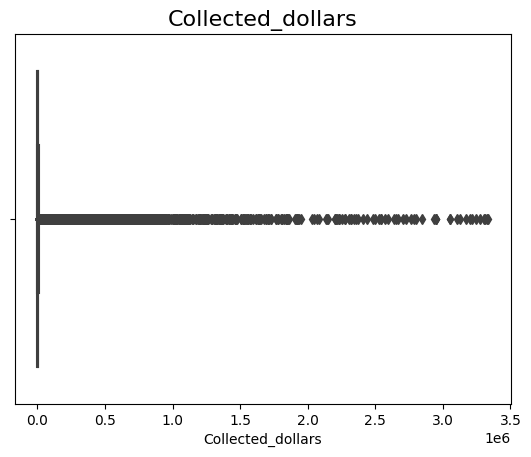

In [22]:
### Нарисуем ящик с усами
boxplot = sns.boxplot(x='Collected_dollars',  data=user_data_new, orient='h')
boxplot.axes.set_title("Collected_dollars", fontsize=16)

Text(0.5, 1.0, 'target = 1')

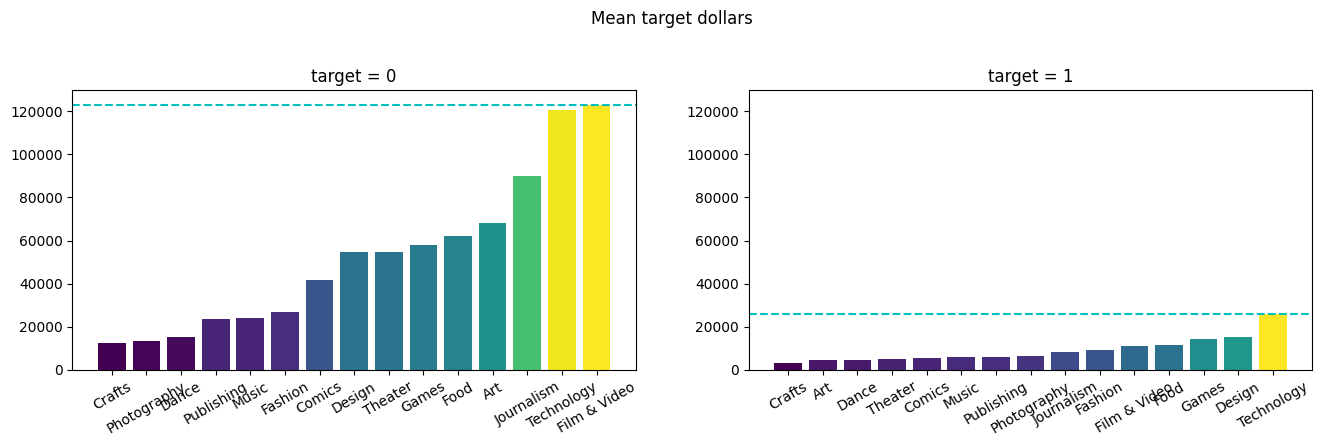

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(16, 8)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

fig.suptitle('Mean target dollars')
hist_1 = user_data_new[user_data_new['target']==0].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_1 = fig.add_subplot(2,2,1)
ax_1.axhline(y=hist_1['Film & Video'], color='c', linestyle='--')
plt.bar(hist_1.index, hist_1.values, color=my_cmap(rescale(hist_1.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,130000)
plt.title('target = 0')

hist_2 = user_data_new[user_data_new['target']==1].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_2 = fig.add_subplot(2,2,2)
ax_2.axhline(y=hist_2['Technology'], color='c', linestyle='--', )
plt.bar(hist_2.index, hist_2.values, color=my_cmap(rescale(hist_2.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,130000)
plt.title('target = 1')

In [24]:
user_data_new = user_data_new.drop(columns = ['Investor', 'Name', 'Collected_dollars', 'Target_dollars'])

In [25]:
user_data_new.head()

,Category,Main_category,Currency,Country,target,Term,Publication_year,name_length
200855,Fashion,Fashion,USD,US,0,39,2009,59
276057,Shorts,Film & Video,USD,US,0,87,2009,30
278951,Illustration,Art,USD,US,1,8,2009,19
92182,Software,Technology,USD,US,1,79,2009,28
206673,Fashion,Fashion,USD,US,0,28,2009,10


In [26]:
categorical_columns = user_data_new.loc[:,user_data_new.dtypes==np.object].columns
user_data_new[categorical_columns].head(2)

/tmp/ipykernel_28/1459166396.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = user_data_new.loc[:,user_data_new.dtypes==np.object].columns


,Category,Main_category,Currency,Country
200855,Fashion,Fashion,USD,US
276057,Shorts,Film & Video,USD,US


In [27]:
numeric_columns = user_data_new.loc[:,user_data_new.dtypes!=np.object].columns
user_data_new[numeric_columns].head(2)

/tmp/ipykernel_28/6733163.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = user_data_new.loc[:,user_data_new.dtypes!=np.object].columns


,target,Term,Publication_year,name_length
200855,0,39,2009,59
276057,0,87,2009,30


In [28]:
for col in categorical_columns:
    if user_data_new[col].nunique() <= 20:
        one_hot = pd.get_dummies(user_data_new[col], prefix=col, drop_first=True)
        user_data_new = pd.concat((user_data_new.drop(col, axis=1), one_hot), axis=1)
        
    else:
        mean_target = user_data_new.groupby(col)['target'].mean()
        user_data_new[col] = user_data_new[col].map(mean_target)

In [29]:
user_data_new.head()

,Category,Country,target,Term,Publication_year,name_length,Main_category_Comics,Main_category_Crafts,Main_category_Dance,Main_category_Design,...,Currency_EUR,Currency_GBP,Currency_HKD,Currency_JPY,Currency_MXN,Currency_NOK,Currency_NZD,Currency_SEK,Currency_SGD,Currency_USD
200855,0.290610,0.418125,0,39,2009,59,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
276057,0.585659,0.418125,0,87,2009,30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
278951,0.562630,0.418125,1,8,2009,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
92182,0.144190,0.418125,1,79,2009,28,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
206673,0.290610,0.418125,0,28,2009,10,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Определимся с таргетом

In [30]:
### Разделим данные на объекты и ответы

X = user_data_new.drop('target', axis=1)
Y = user_data_new['target']

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=0,
                                                    shuffle=True, 
                                                    test_size=0.2)

In [33]:
(y_train==0).sum(), (y_train==1).sum()

(157941, 107367)

In [34]:
(y_train==0).sum()/(y_train==1).sum()

1.47103858727542

#### Let's train 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [36]:
#MODEL
model_LR = LogisticRegression(random_state=42, max_iter=1000)
model_SVC= LinearSVC(random_state=42, max_iter=1000) 
model_CB = CatBoostClassifier(random_state=42, verbose=0)
model_GB = GradientBoostingClassifier(random_state=42, verbose=0)
model_DT = DecisionTreeClassifier(random_state=42)
model_RF = RandomForestClassifier(random_state=42, verbose=0)
model_StS = StandardScaler()


models = [model_LR,model_SVC,model_CB,model_GB,model_DT,model_RF]
name_models = [i.__class__.__name__ for i in models]

In [60]:
def learn_model(models):
    results_train = []
    results_test = []
    for model  in models:
        model.fit(X_train, y_train)
        score_train = roc_auc_score(y_train, model.predict(X_train))
        score_test = roc_auc_score(y_test, model.predict(X_test))
        results_train.append(score_train)
        results_test.append(score_test)
        print(f'{model.__class__.__name__} ROC_AUC: train - {score_train:.3f} test - {score_test:.3f}')
    return results_train, results_test

In [61]:
results_train, results_test = learn_model(models)

LogisticRegression ROC_AUC: train - 0.618 test - 0.619


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC ROC_AUC: train - 0.500 test - 0.500
CatBoostClassifier ROC_AUC: train - 0.663 test - 0.650
GradientBoostingClassifier ROC_AUC: train - 0.643 test - 0.644
DecisionTreeClassifier ROC_AUC: train - 0.872 test - 0.584
RandomForestClassifier ROC_AUC: train - 0.880 test - 0.610


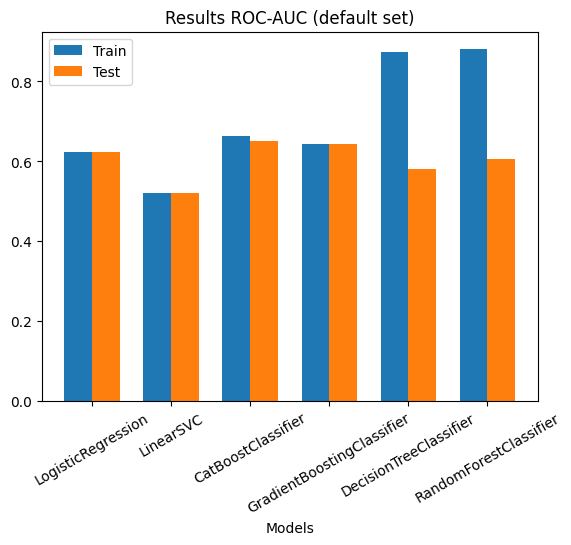

In [80]:
import matplotlib.pyplot as plt


bar_width = 0.35
index = np.arange(len(name_models))


plt.bar(index, results_train, width=bar_width, label='Train')
plt.bar(index + bar_width, results_test, width=bar_width, label='Test')


plt.title('Results ROC-AUC (default set)')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)


plt.legend()


plt.show()

In [82]:
def learn_model_SC(models):
    results_train = []
    results_test = []
    for model  in models:
        pipe = Pipeline([('scaler', StandardScaler()), ('LR', model)])
        pipe.fit(X_train, y_train)
        score_train = roc_auc_score(y_train, pipe.predict(X_train))
        score_test = roc_auc_score(y_test, pipe.predict(X_test))
        results_train.append(score_train)
        results_test.append(score_test)
        print(f'{model.__class__.__name__} ROC_AUC: train - {score_train:.3f} test - {score_test:.3f}')
    return results_train, results_test


In [83]:
results_train_SC,results_test_SC = learn_model_SC(models)

LogisticRegression ROC_AUC: train - 0.625 test - 0.625


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC ROC_AUC: train - 0.624 test - 0.625
CatBoostClassifier ROC_AUC: train - 0.663 test - 0.650
GradientBoostingClassifier ROC_AUC: train - 0.643 test - 0.643
DecisionTreeClassifier ROC_AUC: train - 0.873 test - 0.582
RandomForestClassifier ROC_AUC: train - 0.880 test - 0.606


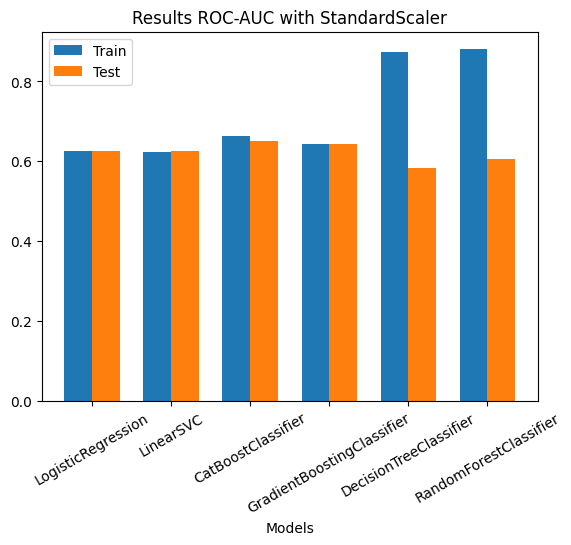

In [88]:
import matplotlib.pyplot as plt


bar_width = 0.35
index = np.arange(len(name_models))


plt.bar(index, results_train_SC, width=bar_width, label='Train')
plt.bar(index + bar_width, results_test_SC, width=bar_width, label='Test')


plt.title('Results ROC-AUC with StandardScaler')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)


plt.legend()


plt.show()

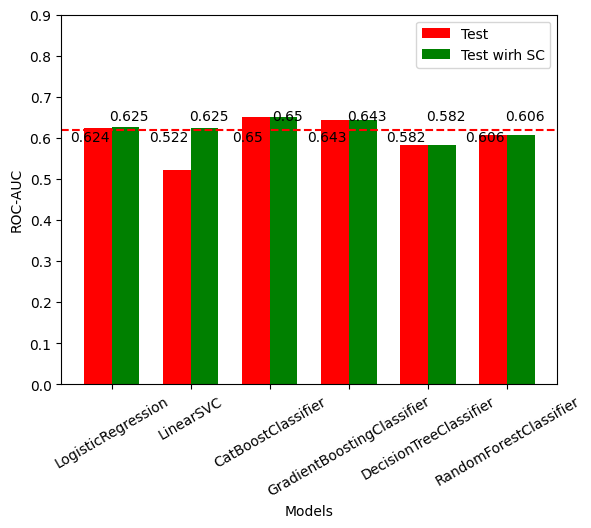

In [89]:
import matplotlib.pyplot as plt


bar_width = 0.35

index = np.arange(len(name_models))


plt.bar(index, results_test, width=bar_width, label='Test', color='red')
plt.bar(index + bar_width, results_test_SC, width=bar_width, label='Test wirh SC', color='green')


plt.ylabel('ROC-AUC')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)
plt.ylim(0.0,0.9 )
plt.axhline (y=0.619, color='red', linestyle='--')
plt.legend()

for i, n in  enumerate(results_test):
    plt.annotate(str(round(results_test_SC[i],3)), (index[i]+0.4, results_test_SC[0]+0.01), ha='center', va='bottom')
    plt.annotate(str(round(results_test[i],3)), (index[i]-0.1, results_test_SC[0]-0.04), ha='center', va='bottom')

plt.show()

In [90]:
y_train[y_train==1].shape[0]

107046

In [91]:
Count_1 = y_train[y_train==1].shape[0]
Count_0 = y_train[y_train==0].shape[0]
print(f'Count target 1 = {Count_1}')
print(f'Count target 0 = {Count_0}')
print(f'Rate = {Count_0 / Count_1:.3}')

Count target 1 = 107046
Count target 0 = 158253
Rate = 1.48


In [100]:

splitter = TimeSeriesSplit(n_splits=5) 
pipe_LR = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(random_state=42, max_iter=1000,class_weight={0:1.0,1:1.47},solver='liblinear'))])
param_grid_LR = {'LR__C':  np.linspace(0.000001, 0.1, 10),
                'LR__penalty': ['l1', 'l2']}

### Передадим в GridSearchCV

search_LR = GridSearchCV(pipe_LR,
                      param_grid_LR,
                      cv=splitter,
                      scoring='roc_auc',
                      verbose=10,return_train_score=True)

search_LR.fit(X_train, y_train)

print(f"Best parameter (CV score={search_LR.best_score_:.5f}):")
print(search_LR.best_params_)

print(f"Best parameter finaly test: {search_LR.score(X_test, y_test)}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START LR__C=1e-06, LR__penalty=l1................................
[CV 1/5; 1/20] END LR__C=1e-06, LR__penalty=l1;, score=(train=0.500, test=0.500) total time=   0.2s
[CV 2/5; 1/20] START LR__C=1e-06, LR__penalty=l1................................
[CV 2/5; 1/20] END LR__C=1e-06, LR__penalty=l1;, score=(train=0.500, test=0.500) total time=   0.4s
[CV 3/5; 1/20] START LR__C=1e-06, LR__penalty=l1................................
[CV 3/5; 1/20] END LR__C=1e-06, LR__penalty=l1;, score=(train=0.500, test=0.500) total time=   0.6s
[CV 4/5; 1/20] START LR__C=1e-06, LR__penalty=l1................................
[CV 4/5; 1/20] END LR__C=1e-06, LR__penalty=l1;, score=(train=0.500, test=0.500) total time=   0.7s
[CV 5/5; 1/20] START LR__C=1e-06, LR__penalty=l1................................
[CV 5/5; 1/20] END LR__C=1e-06, LR__penalty=l1;, score=(train=0.500, test=0.500) total time=   0.9s
[CV 1/5; 2/20] START LR__C=1e-06,

In [135]:
search_LR.cv_results_['mean_test_score'][0::2]

array([0.5       , 0.70001917, 0.69999145, 0.69997779, 0.69997151,
       0.69996658, 0.6999628 , 0.69996102, 0.69996031, 0.69996003])

In [137]:
def plot_validation_curves(param_values, train, test):
    train_line = plt.plot(param_values, train, '-', label='train', color='green')
    valid_line = plt.plot(param_values, test, '-', label='test', color='red')

    plt.legend()

(0.5, 0.71)

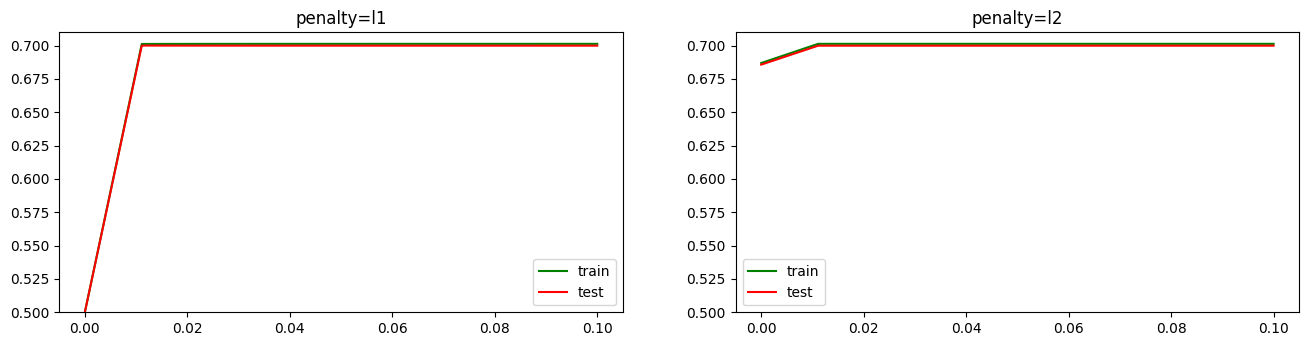

In [145]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(16, 8)


plt.subplot(2,2,1)
plot_validation_curves(param_grid_LR['LR__C'], search_LR.cv_results_['mean_train_score'][0::2],search_LR.cv_results_['mean_test_score'][0::2])
plt.title('penalty=l1')
plt.ylim(0.5,0.71)
plt.subplot(2,2,2)
plot_validation_curves(param_grid_LR['LR__C'], search_LR.cv_results_['mean_train_score'][1::2],search_LR.cv_results_['mean_test_score'][1::2])
plt.title('penalty=l2')
plt.ylim(0.5,0.71)

In [ ]:
splitter = TimeSeriesSplit(n_splits=5) 
pipe_CB = Pipeline([('scaler', StandardScaler()), ('CB', CatBoostClassifier(random_state=42, verbose=0, class_weights={0:1.0,1:1.47

In [45]:
splitter = TimeSeriesSplit(n_splits=5) 
pipe_CB = Pipeline([('scaler', StandardScaler()), ('CB', CatBoostClassifier(random_state=42, verbose=0, class_weights={0:1.0,1:1.47}))])
param_grid_CB = {'CB__depth': [6, 8, 12],
                 'CB__l2_leaf_reg':[3, 6, 10]}

### Передадим в GridSearchCV

search_CB = GridSearchCV(pipe_CB,
                      param_grid_CB,
                      cv=splitter,
                      scoring='roc_auc',
                      verbose=15,return_train_score=True)

search_CB.fit(X_train, y_train)

print(f"Best parameter (CV score={search_CB.best_score_:.5f}):")
print(search_CB.best_params_)

print(f"Best parameter finaly test: {search_CB.score(X_test, y_test)}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START CB__depth=6, CB__l2_leaf_reg=3..............................
[CV 1/5; 1/9] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.753, test=0.721) total time=  10.2s
[CV 2/5; 1/9] START CB__depth=6, CB__l2_leaf_reg=3..............................
[CV 2/5; 1/9] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.742, test=0.726) total time=  18.1s
[CV 3/5; 1/9] START CB__depth=6, CB__l2_leaf_reg=3..............................
[CV 3/5; 1/9] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.738, test=0.724) total time=  25.5s
[CV 4/5; 1/9] START CB__depth=6, CB__l2_leaf_reg=3..............................
[CV 4/5; 1/9] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.735, test=0.729) total time=  32.7s
[CV 5/5; 1/9] START CB__depth=6, CB__l2_leaf_reg=3..............................
[CV 5/5; 1/9] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.735, test=0.724) total time=  40.2s
[CV 1/5; 2/9] START CB__d

In [139]:
for i in range(0,9):
    Results_catboost_params[i]['result train'] = round(search_CB.cv_results_['mean_train_score'][i],3)
    Results_catboost_params[i]['result test'] = round(search_CB.cv_results_['mean_test_score'][i],3)
pd.DataFrame(Results_catboost_params)

,CB__depth,CB__l2_leaf_reg,result train,result test
0,6,3,0.741,0.725
1,6,6,0.740,0.725
2,6,10,0.739,0.725
3,8,3,0.756,0.725
4,8,6,0.754,0.725
5,8,10,0.752,0.725
6,12,3,0.804,0.720
7,12,6,0.797,0.721
8,12,10,0.791,0.722


In [150]:
model_LR = LogisticRegression(random_state=42, verbose=0)
pipe_LR = Pipeline([('scaler', StandardScaler()), ('LR', model_LR)])
model_CB = CatBoostClassifier(random_state=42, verbose=0)
pipe_CB = Pipeline([('scaler', StandardScaler()), ('CB', model_CB)])

In [151]:
from sklearn.model_selection import cross_validate
splitter = TimeSeriesSplit(n_splits=5) 

pipe_LR.fit(X_train, y_train)
cv_model_LR = cross_validate(pipe_LR, X_train, y_train,
                              scoring='roc_auc',cv=splitter,return_train_score=True)

pipe_CB.fit(X_train, y_train)
cv_model_CB = cross_validate(pipe_CB, X_train, y_train, 
                              scoring='roc_auc',cv=splitter,return_train_score=True)

In [154]:
train_LR_default = round(np.mean(cv_model_LR['train_score']),3)
Test_LR_default = round(np.mean(cv_model_LR['test_score']),3)
Finaly_test_LR_default = round(pipe_LR.score(X_test, y_test),3)
print(f"train LR default: {train_LR_default}")
print(f"Test LR default: {Test_LR_default}")
print(f"Finaly test LR default: {Finaly_test_LR_default}")

train_CB_default = round(np.mean(cv_model_CB['train_score']),3)
Test_CB_default = round(np.mean(cv_model_CB['test_score']),3)
Finaly_test_CB_default = round(pipe_CB.score(X_test, y_test),3)
print(f"train CB default: {Test_CB_default}")
print(f"Test CB default: {Test_CB_default}")
print(f"Finaly test CB default: {Finaly_test_CB_default}")

train LR default: 0.701
Test LR default: 0.7
Finaly test LR default: 0.662
train CB default: 0.725
Test CB default: 0.725
Finaly test CB default: 0.68


In [142]:
model_LR_sp = LogisticRegression(random_state=42, verbose=0) #sp- set params
model_LR_sp.set_params(**{'class_weight': {0:1.0,1:1.47}})
pipe_LR_sp = Pipeline([('scaler', StandardScaler()), ('LR', model_LR_sp)])

model_CB_sp = CatBoostClassifier(random_state=42, verbose=0)
model_CB_sp.set_params(**{'class_weights': {0: 1.0, 1: 1.47}})
pipe_CB_sp = Pipeline([('scaler', StandardScaler()), ('CB', model_CB_sp)])


In [144]:
from sklearn.model_selection import cross_validate
splitter = TimeSeriesSplit(n_splits=5) 

pipe_LR_sp.fit(X_train, y_train)
cv_model_LR_sp = cross_validate(pipe_LR_sp, X_train, y_train,
                              scoring='roc_auc',cv=splitter,return_train_score=True)

pipe_CB_sp.fit(X_train, y_train)
cv_model_CB_sp = cross_validate(pipe_CB_sp, X_train, y_train, 
                              scoring='roc_auc',cv=splitter,return_train_score=True)

In [146]:
train_LR_sp = round(np.mean(cv_model_LR_sp['train_score']),3) #sp - set parametrs
Test_LR_sp = round(np.mean(cv_model_LR_sp['test_score']),3)
Finaly_test_LR_sp = round(pipe_LR_sp.score(X_test, y_test),3)
print(f"train LR set parametrs: {train_LR_sp}")
print(f"Test LR set parametrs: {Test_LR_sp}")
print(f"Finaly test LR  set parametrs: {Finaly_test_LR_sp}")

train_CB_sp = round(np.mean(cv_model_CB_sp['train_score']),3)
Test_CB_sp = round(np.mean(cv_model_CB_sp['test_score']),3)
Finaly_test_CB_sp = round(pipe_CB_sp.score(X_test, y_test),3)
print(f"train CB  set parametrs: {train_CB_sp}")
print(f"Test CB  set parametrs: {Test_CB_sp}")
print(f"Finaly test CB  set parametrs: {Finaly_test_CB_sp}")

train LR set parametrs: 0.701
Test LR set parametrs: 0.7
Finaly test LR  set parametrs: 0.648
train CB  set parametrs: 0.756
Test CB  set parametrs: 0.725
Finaly test CB  set parametrs: 0.662


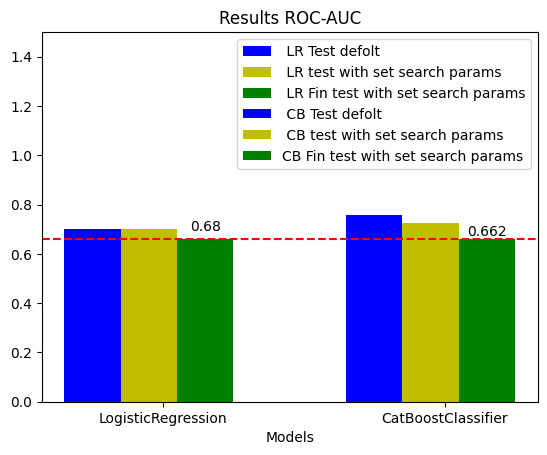

In [185]:
bar_width = 0.4


plt.bar(0, train_LR_default, width=bar_width, label=' LR Test defolt', color='b')
plt.bar(0 + bar_width, Test_LR_default, width=bar_width, label=' LR test with set search params', color='y')
plt.bar(0 + bar_width*2, Finaly_test_LR_default, width=bar_width, label=' LR Fin test with set search params', color='g')


plt.bar(2, train_CB_sp, width=bar_width, label=' CB Test defolt', color='b')
plt.bar(2 + bar_width, Test_CB_sp, width=bar_width, label=' CB test with set search params', color='y')
plt.bar(2 + bar_width*2, Finaly_test_CB_sp, width=bar_width, label='CB Fin test with set search params', color='g')

#plt.annotate(str(round(results_test[0],3)), (index[0], results_test[0]), ha='center', va='bottom')
#plt.annotate(str(round(results_test_with_set[0],3)), (index[0]+0.35, results_test_with_set[0]), ha='center', va='bottom')

#plt.annotate(str(round(results_test[1],3)), (index[1], results_test[1]), ha='center', va='bottom')
#plt.annotate(str(round(results_test_with_set[1],3)), (index[1]+0.35, results_test_with_set[0]), ha='center', va='bottom')

plt.title('Results ROC-AUC')
plt.xlabel('Models')
plt.ylim(0.0, 1.5)

plt.legend()


plt.axhline (y=Finaly_test_CB_sp, color='red', linestyle='--')
plt.annotate(str(round(Finaly_test_CB_sp,3)), (2.8, Finaly_test_CB_sp), ha='center', va='bottom')
plt.annotate(str(round(Finaly_test_CB_default,3)), (0.8, Finaly_test_CB_default), ha='center', va='bottom')
plt.xticks([0.5,2.5], ['LogisticRegression','CatBoostClassifier'])
plt.legend()


In [186]:
# Получение коэффициентов модели
coefficients = model_LR.coef_

# Получение значимости признаков
importance = np.abs(coefficients)

In [190]:
for i, feature in enumerate(X_train.columns):
    print(f"Значимость признака {feature}: {round(importance[0][i],2)}")

Значимость признака Category: 0.65
Значимость признака Country: 0.21
Значимость признака Term: 0.27
Значимость признака Publication_year: 0.07
Значимость признака name_length: 0.21
Значимость признака Main_category_Comics: 0.01
Значимость признака Main_category_Crafts: 0.0
Значимость признака Main_category_Dance: 0.01
Значимость признака Main_category_Design: 0.0
Значимость признака Main_category_Fashion: 0.0
Значимость признака Main_category_Film & Video: 0.02
Значимость признака Main_category_Food: 0.0
Значимость признака Main_category_Games: 0.0
Значимость признака Main_category_Journalism: 0.0
Значимость признака Main_category_Music: 0.01
Значимость признака Main_category_Photography: 0.0
Значимость признака Main_category_Publishing: 0.0
Значимость признака Main_category_Technology: 0.03
Значимость признака Main_category_Theater: 0.0
Значимость признака Currency_CAD: 0.01
Значимость признака Currency_CHF: 0.0
Значимость признака Currency_DKK: 0.0
Значимость признака Currency_EUR: 0

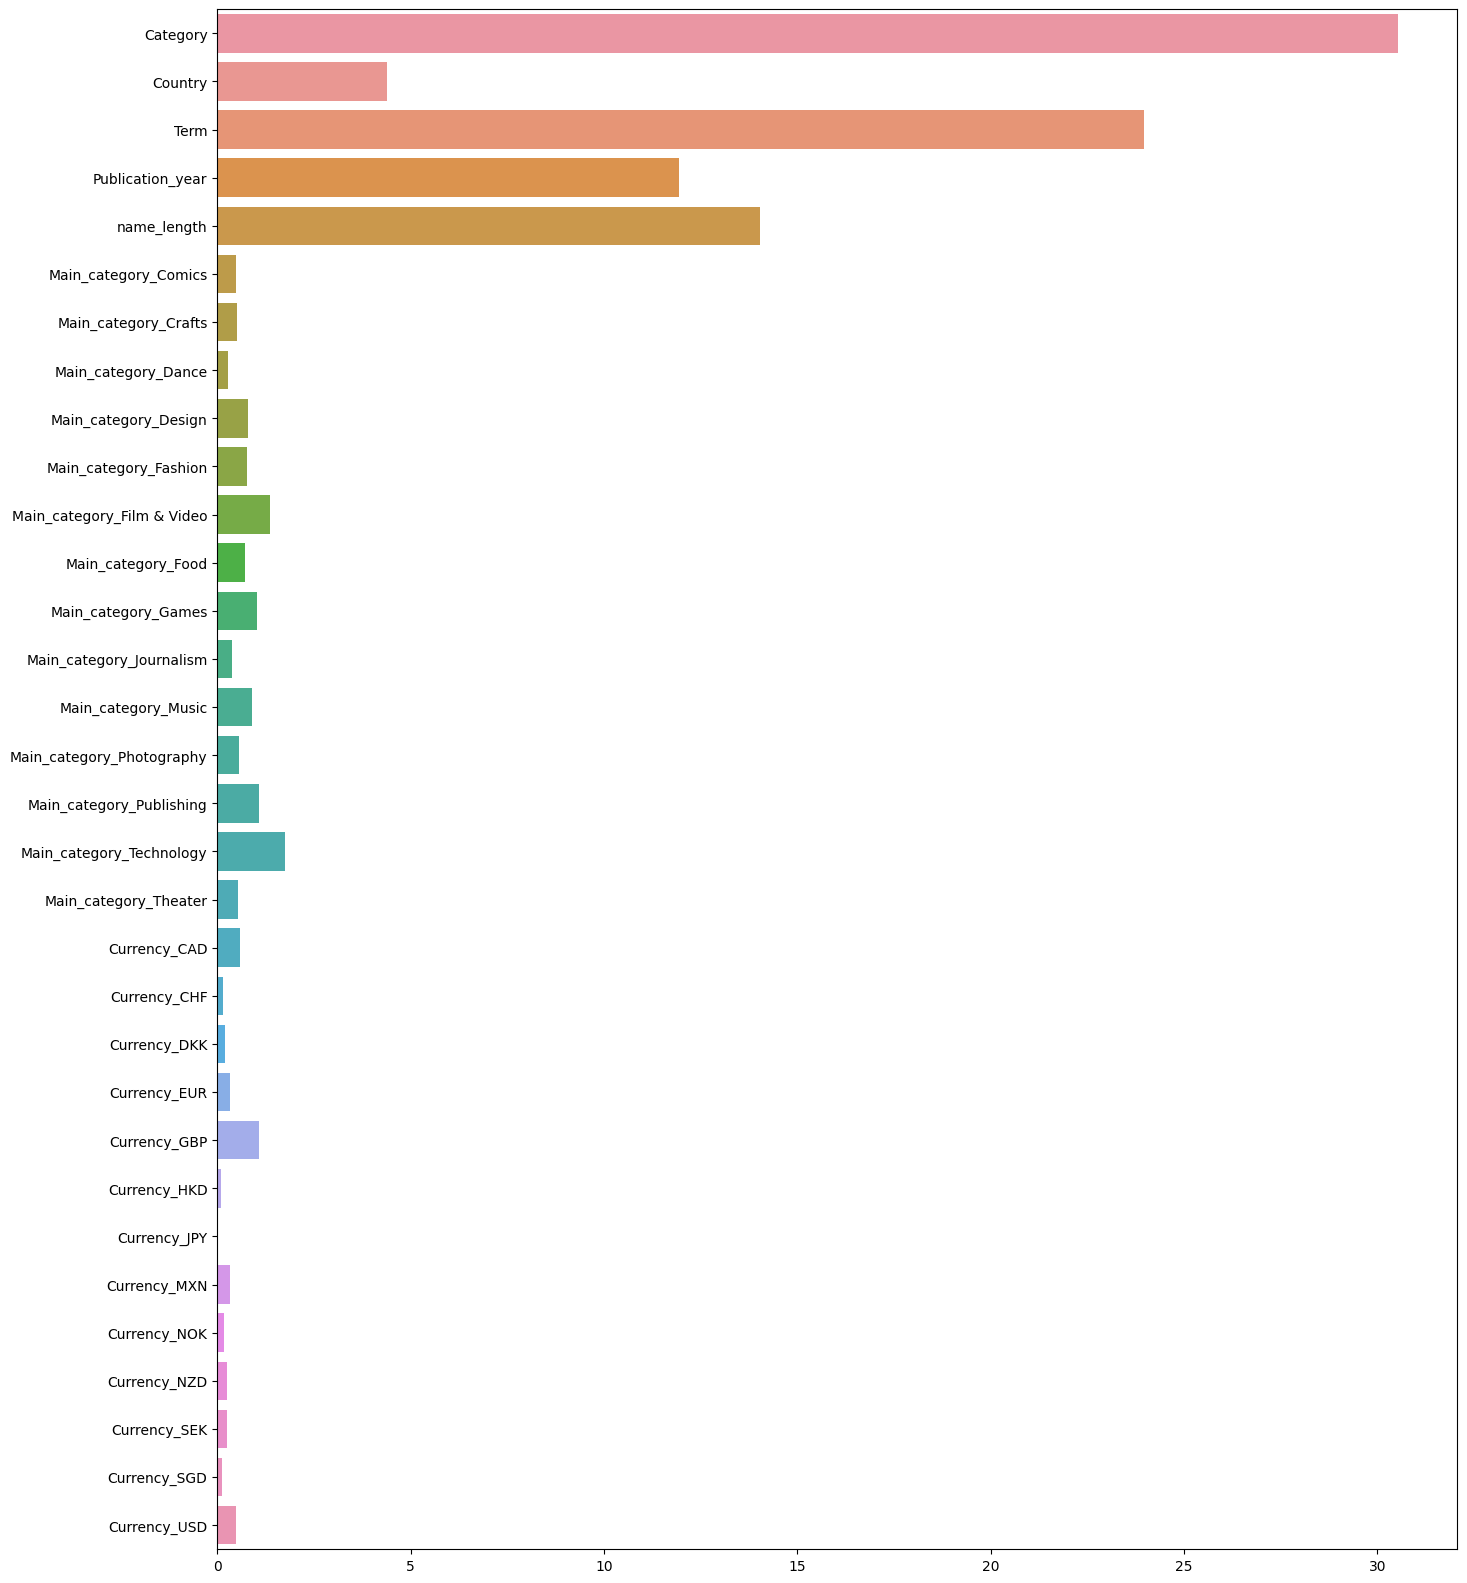

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 20)

sns.barplot(x=model_CB.feature_importances_,
            y=X_train.columns)


plt.show()